# **MNIST**
## **Recognition of hand-written characters from the scikit-learn database using a CNN**



In [2]:
# Load the digits dataset from scikit-learn
# Import datasets and performance metrics
from sklearn import datasets
digits = datasets.load_digits() #MNIST dataset

The data we are interested in are 
8x8 images of digits. A CNN can process images directly without having them to be vectorized. Work directly with the **digits.images** from sklearn.datasets .


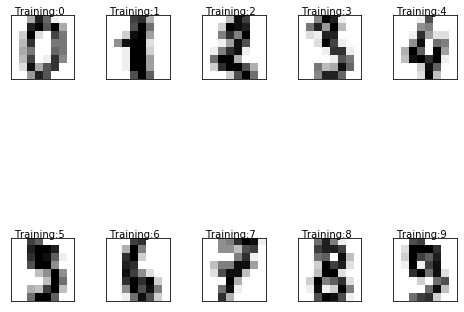

In [3]:
# Image visualization with matplotlib
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,5, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.05, wspace=0.5))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05,1,str('Training:%d'%digits.target[i]),transform=ax.transAxes, color='black')

In [0]:
digits.images.shape

(1797, 8, 8)

Convert the target into the matrix 'y' in one-hot format. 

In [0]:
import keras
label=keras.utils.to_categorical(digits.target,num_classes=10)

Adjust the shape of dataset

Print the shape of your array X. You should have a 4-D array with the last dimension equal to 1.

In [0]:
import numpy as np
print(digits.images.shape)
img=digits.images[:,:,:,np.newaxis]  #create the final dimension
print(img.shape)    

(1797, 8, 8)
(1797, 8, 8, 1)


## Prepare the train and test dataset.


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(img,label, test_size=0.25, random_state=42)

## create a sequential model



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
input_shape = (8, 8, 1)
num_classes=10
model = Sequential()
model.add(Conv2D(5, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# compile the model. Use the categorical crossentropy, the adam optimizer and accuracy
# as the evaluation metric...
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


## train the model



In [0]:
# train the model...

hist=model.fit(x_train,y_train,batch_size=10,validation_split=0.25,nb_epoch=300,shuffle=True,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1010 samples, validate on 337 samples
Epoch 1/300
1010/1010 [==============================] - 0s 450us/step - loss: 3.7722 - acc: 0.1436 - val_loss: 2.3694 - val_acc: 0.1187
Epoch 2/300
1010/1010 [==============================] - 0s 186us/step - loss: 2.2114 - acc: 0.1505 - val_loss: 2.2449 - val_acc: 0.1573
Epoch 3/300
1010/1010 [==============================] - 0s 185us/step - loss: 2.0788 - acc: 0.1911 - val_loss: 2.0850 - val_acc: 0.1988
Epoch 4/300
1010/1010 [==============================] - 0s 180us/step - loss: 1.9287 - acc: 0.2554 - val_loss: 1.9595 - val_acc: 0.2997
Epoch 5/300
1010/1010 [==============================] - 0s 172us/step - loss: 1.7235 - acc: 0.3257 - val_loss: 1.7093 - val_acc: 0.4095
Epoch 6/300
1010/1010 [==============================] - 0s 194us/step - loss: 1.4695 - acc: 0.4772 - val_loss: 1.5309 - val_acc: 0.4510
Epoch 7/300
1010/1010 [==============================] - 0s 177us/step - loss: 1.2637 - acc: 0.5782 - val_loss: 1.3320 - val_acc: 0

## Analyze the results.


In [0]:
# print the model summary...
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 5)           50        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 45)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 620
Trainable params: 620
Non-trainable params: 0
_________________________________________________________________


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

Confusion matrix, without normalization
[[41  0  0  1  0  1  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 36  1  0  0  0  0  1  0]
 [ 0  0  1 42  0  1  0  0  2  0]
 [ 0  0  0  0 54  0  1  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 1  0  0  0  0  1  0  0  4 42]]


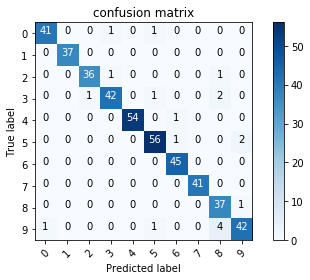

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["0","1","2","3","4","5","6","7","8","9"]
y_test_pred = model.predict(x_test).round()
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=False,title='confusion matrix')
plt.show()

Normalize the confusion matrix to show graphically the prediction probability map.



Normalized confusion matrix
[[0.95348837 0.         0.         0.02325581 0.         0.02325581
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.94736842 0.02631579 0.         0.
  0.         0.         0.02631579 0.        ]
 [0.         0.         0.02173913 0.91304348 0.         0.02173913
  0.         0.         0.04347826 0.        ]
 [0.         0.         0.         0.         0.98181818 0.
  0.01818182 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.94915254
  0.01694915 0.         0.         0.03389831]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.973684

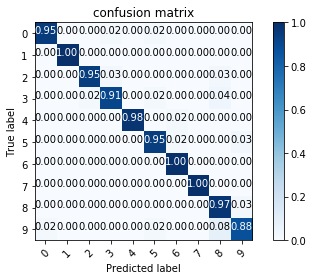

number 0 counts: 41
number 1 counts: 37
number 2 counts: 36
number 3 counts: 42
number 4 counts: 54
number 5 counts: 56
number 6 counts: 45
number 7 counts: 41
number 8 counts: 37
number 9 counts: 42


In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='confusion matrix')
plt.show()
for i in range(10):
  print('number %d counts: %d'%(i,cnf_matrix[i,i]))

Evaluate the model on the test dataset. 


In [0]:
print('accuracy on the test dataset is',model.evaluate(x_test,y_test,batch_size=1)[1])

450/450 [==============================] - 0s 536us/step
accuracy on the test dataset is 0.9577777777777777


**history plot**


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


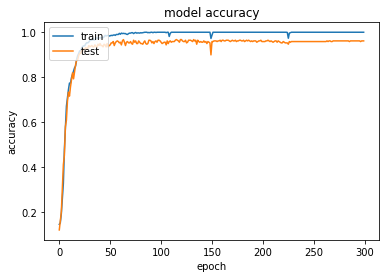

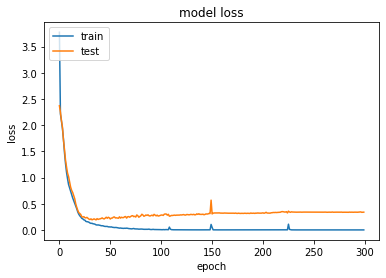

In [0]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()